In [1]:
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as pyl

In [2]:
url="https://en.wikipedia.org/wiki/Demographics_of_Ukraine"
response= requests.get(url)
soup=BeautifulSoup(response.text, 'lxml')
wiki=soup.find_all('table', class_="wikitable sortable")

In [3]:
for trol in wiki:
    thl=[]
    gnom=trol.find_all('tr')
    for gnol in gnom[0].find_all('th'):
        thl.append(gnol.text.strip())
        tabele={tehel:[]  for tehel in thl}


    for angel in gnom[1:]:
        tp=angel.find_all('td')
        if len(tp)==len(thl):
            for th, tpl in zip(thl,tp ):
                tabele[th].append(tpl.text.strip())

In [4]:
wiersze= pd.DataFrame(tabele)
wiersz=pd.concat([wiersze, wiersze], ignore_index=True)
wp=wiersz.replace("-",pd.NA, inplace=True)
tlc=wiersz.head()[0:1]

In [18]:
wiersz.fillna(0, inplace=True)
print(wiersz.dtypes)
value=wiersz.isnull().sum()
new_wiersz=wiersz.drop([6])
print(new_wiersz)
wiersz['Population']=pd.to_numeric(wiersz['Population'], errors='coerce')
wiersz['Native']=pd.to_numeric(wiersz['Native'], errors='coerce')
wiersz['Ukrainian']=pd.to_numeric(wiersz['Ukrainian'], errors='coerce')
wiersz['Russian']=pd.to_numeric(wiersz['Russian'], errors='coerce')
wiersz['Other']=pd.to_numeric(wiersz['Other'], errors='coerce')
wiersz['Population'].fillna(wiersz['Population'].mean(), inplace=True)
wiersz['Native'].fillna(wiersz['Native'].mean(), inplace=True)
wiersz['Russian'].fillna(wiersz['Russian'].mean(), inplace=True)
wiersz['Other'].fillna(wiersz['Other'].mean(), inplace=True)
print(wiersz)

Ethnic group     object
Population      float64
Native          float64
Ukrainian       float64
Russian         float64
Other             int64
dtype: object
       Ethnic group  Population  Native  Ukrainian  Russian  Other
0        Ukrainians         0.0     0.0        0.0  588.375    532
1          Russians         0.0     0.0        0.0  588.375    402
2         Moldovans         0.0     0.0        0.0  588.375   1242
3    Crimean Tatars         0.0     0.0      184.0  588.375     43
4        Bulgarians         0.0     0.0        0.0  588.375      9
..              ...         ...     ...        ...      ...    ...
105   Kyrgyz people         0.0   208.0      221.0  617.000     19
106            Laks         0.0   199.0      271.0  514.000     13
107         Afghans         0.0   551.0       60.0  213.000      0
108           other         0.0     0.0      144.0  790.000      0
109              NA         0.0     0.0        0.0  588.375      1

[109 rows x 6 columns]
       Ethnic 

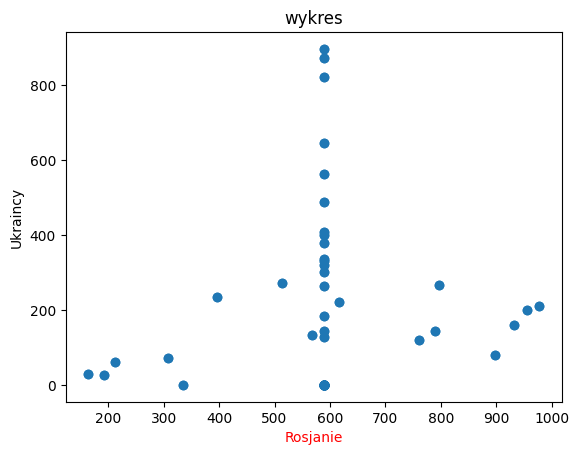

In [36]:
x=wiersz['Russian']
y=wiersz['Ukrainian']

plt.scatter(x,y)
plt.xlabel("Rosjanie", color='red')
plt.ylabel("Ukraincy")
plt.title("wykres")

plt.show()